In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data= pd.read_csv("C:/Users/Dell/OneDrive/Desktop/competitons/Worksheet in 6796bd2167e3d_HexaMart_Case.csv", encoding= "ISO-8859-1")

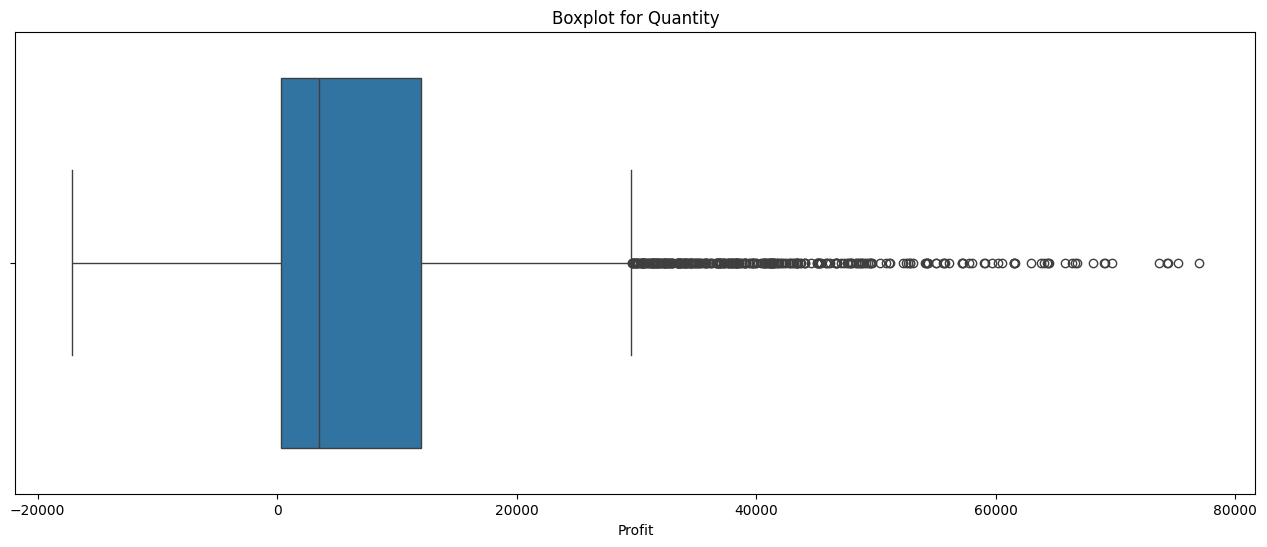

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (16,6))
sns.boxplot(x=data['Profit'])
plt.title('Boxplot for Quantity')
plt.show()

In [4]:
from scipy import stats

#calculating the z-score 
z_scores= stats.zscore(data['Profit'])

#creating a mask to identify outliers 
mask= (z_scores>3)|(z_scores< -3)

#removing outliers 
data_cleaned= data[~mask]

print(data_cleaned)

      Customer ID  Quantity   Order ID       Region Customer Type  \
0           40333        38   SCHE-867  South India           Pro   
1           18111        41  NDEL-5690  North India           Pro   
2           37699         1  WPAN-3389   West India       Regular   
3           36722        24  ERAN-8249   East India       Regular   
4           21943        18  NDEH-1618  North India       Regular   
...           ...       ...        ...          ...           ...   
3903        38381        23   NDEH-372  North India           Pro   
3904        12547        12  WPAN-1146   West India       Regular   
3905        14354        20  EPAT-2214   East India         Trial   
3906        45316         8  EPAT-9109   East India         Trial   
3907        25547         9  SHYD-6524  South India       Regular   

     Payment Method Date of Order       City        Product Line  Unit Price  \
0       Credit Card    29-11-2015    Chennai          Home Décor        9361   
1       Net

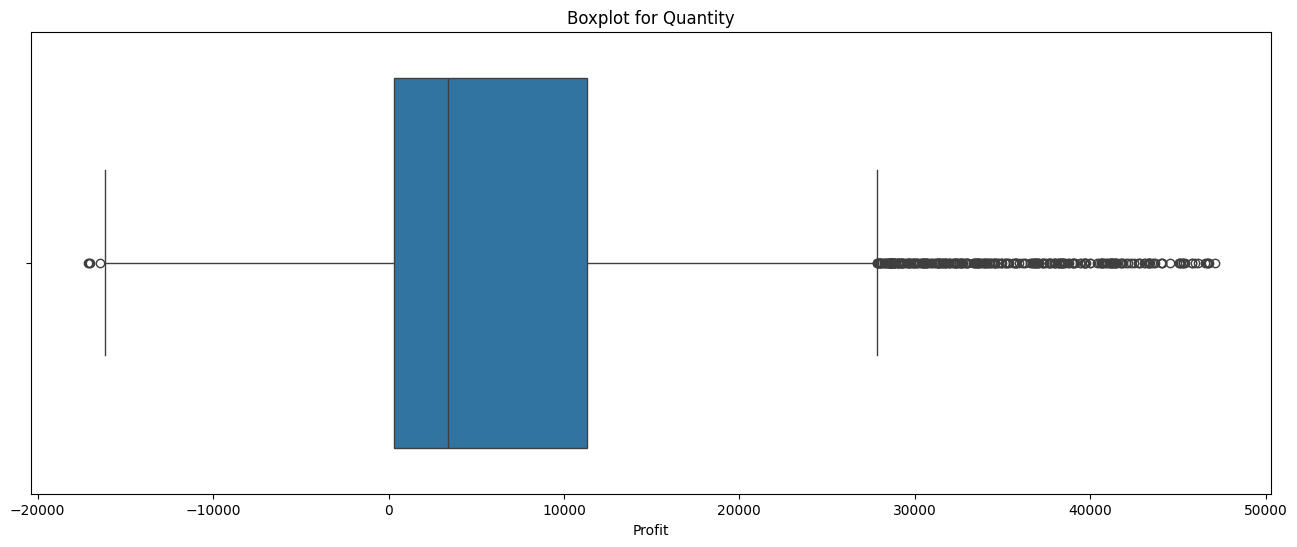

In [5]:
plt.figure(figsize= (16,6))
sns.boxplot(x=data_cleaned['Profit'])
plt.title('Boxplot for Quantity')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler() 
numeric_features = ['Quantity', 'Unit Price', 'Total Sales', 'Profit'] 
data_cleaned[numeric_features] = scaler.fit_transform(data_cleaned[numeric_features])

C:\Users\Dell\AppData\Local\Temp\ipykernel_13020\3054998086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numeric_features] = scaler.fit_transform(data_cleaned[numeric_features])


In [7]:
categorical_cols = ["Region",  "Product Line"]

data_encoded = pd.get_dummies(data_cleaned, columns=categorical_cols, drop_first=True)

print(data_encoded.head())

   Customer ID  Quantity   Order ID Customer Type Payment Method  \
0        40333  1.291085   SCHE-867           Pro    Credit Card   
1        18111  1.532341  NDEL-5690           Pro    Net Banking   
2        37699 -1.684408  WPAN-3389       Regular    Net Banking   
3        36722  0.165222  ERAN-8249       Regular    Net Banking   
4        21943 -0.317290  NDEH-1618       Regular    Credit Card   

  Date of Order      City  Unit Price  Total Sales    Profit  \
0    29-11-2015   Chennai    1.545431     2.706391  2.762813   
1    12-11-2016     Delhi    1.064912     2.398674 -1.880450   
2    08-01-2015    Panaji    1.332799    -1.072835 -0.591508   
3    01-01-2017    Ranchi   -0.181148    -0.011680  0.519200   
4    23-04-2018  Dehradun    0.037079    -0.178462 -0.816787   

   Region_North India  Region_South India  Region_West India  \
0               False                True              False   
1                True               False              False   
2             

In [8]:
bool_cols = data_encoded.select_dtypes(include=['bool']).columns

# Convert only boolean columns to integers (0/1)
data_encoded[bool_cols] = data_encoded[bool_cols].astype(int)

print(data_encoded.dtypes)

Customer ID                          int64
Quantity                           float64
Order ID                            object
Customer Type                       object
Payment Method                      object
Date of Order                       object
City                                object
Unit Price                         float64
Total Sales                        float64
Profit                             float64
Region_North India                   int32
Region_South India                   int32
Region_West India                    int32
Product Line_Food and Beverages      int32
Product Line_Home Décor              int32
Product Line_Kitchen Appliances      int32
Product Line_Skincare                int32
Product Line_Sports                  int32
Product Line_Technology              int32
dtype: object


In [23]:
x= data_encoded.drop(columns= ["Profit", "Customer ID","Customer Type",  "Order ID", "Payment Method", "Date of Order", "City", "Total Sales"])
y= data_encoded["Profit"]

In [24]:
print(y.dtype)

float64


In [25]:
print(x.head())

   Quantity  Unit Price  Region_North India  Region_South India  \
0  1.291085    1.545431                   0                   1   
1  1.532341    1.064912                   1                   0   
2 -1.684408    1.332799                   0                   0   
3  0.165222   -0.181148                   0                   0   
4 -0.317290    0.037079                   1                   0   

   Region_West India  Product Line_Food and Beverages  \
0                  0                                0   
1                  0                                0   
2                  1                                0   
3                  0                                0   
4                  0                                0   

   Product Line_Home Décor  Product Line_Kitchen Appliances  \
0                        1                                0   
1                        0                                0   
2                        0                                1   
3 

In [26]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

In [27]:
print(x.shape, x_train.shape, x_test.shape)

(3833, 11) (3066, 11) (767, 11)


In [28]:
print(y.shape, y_train.shape, y_test.shape)

(3833,) (3066,) (767,)


In [29]:
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
x_train_pred= model.predict(x_train)
print(x_train_pred)

[ 0.11600776  0.32160962  0.28871701 ... -0.45547264 -0.71973807
 -0.17464919]


In [31]:
mse= mean_squared_error(x_train_pred, y_train)
print(mse)

0.7478751257547992


In [32]:
x_test_pred= model.predict(x_test)
print(x_test_pred)

[-3.32600067e-02  1.32656682e-01  6.72004690e-01  5.58965033e-01
 -2.78609093e-01  1.49490755e-01 -2.25421912e-01  7.40035589e-01
 -9.17718909e-01  8.09703176e-01  5.35474914e-01 -6.34811507e-01
 -1.12521709e-01  1.26458193e-01 -7.10116179e-02 -2.96480820e-01
 -6.20528052e-01  6.66842671e-01 -7.10163217e-02  8.57087662e-03
 -1.03760591e-01  6.68574692e-01  2.07215510e-01 -3.10595194e-01
  3.07542232e-01  6.99065799e-01  4.67232084e-01 -1.17629570e-01
 -5.23279313e-01 -4.29457261e-01  2.06531939e-01 -2.06964270e-01
  6.12954639e-01 -6.03007943e-02  4.05552244e-01 -3.59263408e-01
 -3.39240925e-01 -4.96619008e-01 -2.80203523e-01 -6.30273558e-01
 -2.57900184e-01  4.22119019e-02 -3.34895056e-01 -7.40597165e-02
 -4.15894219e-01 -5.55575203e-02 -6.41060087e-01  7.37764091e-01
  5.10225677e-01  3.51259141e-01 -5.78077584e-01 -4.33549735e-01
 -6.80480468e-01 -3.69488918e-04 -6.88816694e-01 -4.23568699e-01
 -2.07111152e-02  7.40788516e-01  1.00056074e-01 -8.06286361e-01
 -9.70040639e-01 -4.02251

In [33]:
mse2= mean_squared_error(x_test_pred, y_test)
print(mse2)

0.8813826962805814


In [34]:
coefficients = np.abs(model.coef_) 
features = x_train.columns 

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': coefficients})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


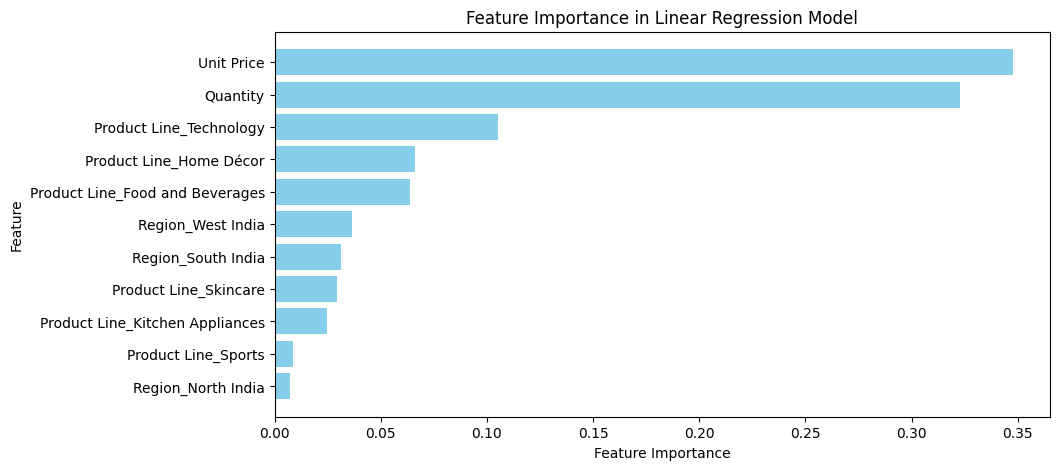

In [35]:
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Linear Regression Model")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()